[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1015 entries, 2020-01-02 to 2024-01-12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     1015 non-null   object 
 1   Open       1015 non-null   float64
 2   High       1015 non-null   float64
 3   Low        1015 non-null   float64
 4   Close      1015 non-null   float64
 5   Adj Close  1015 non-null   float64
 6   Volume     1015 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 63.4+ KB


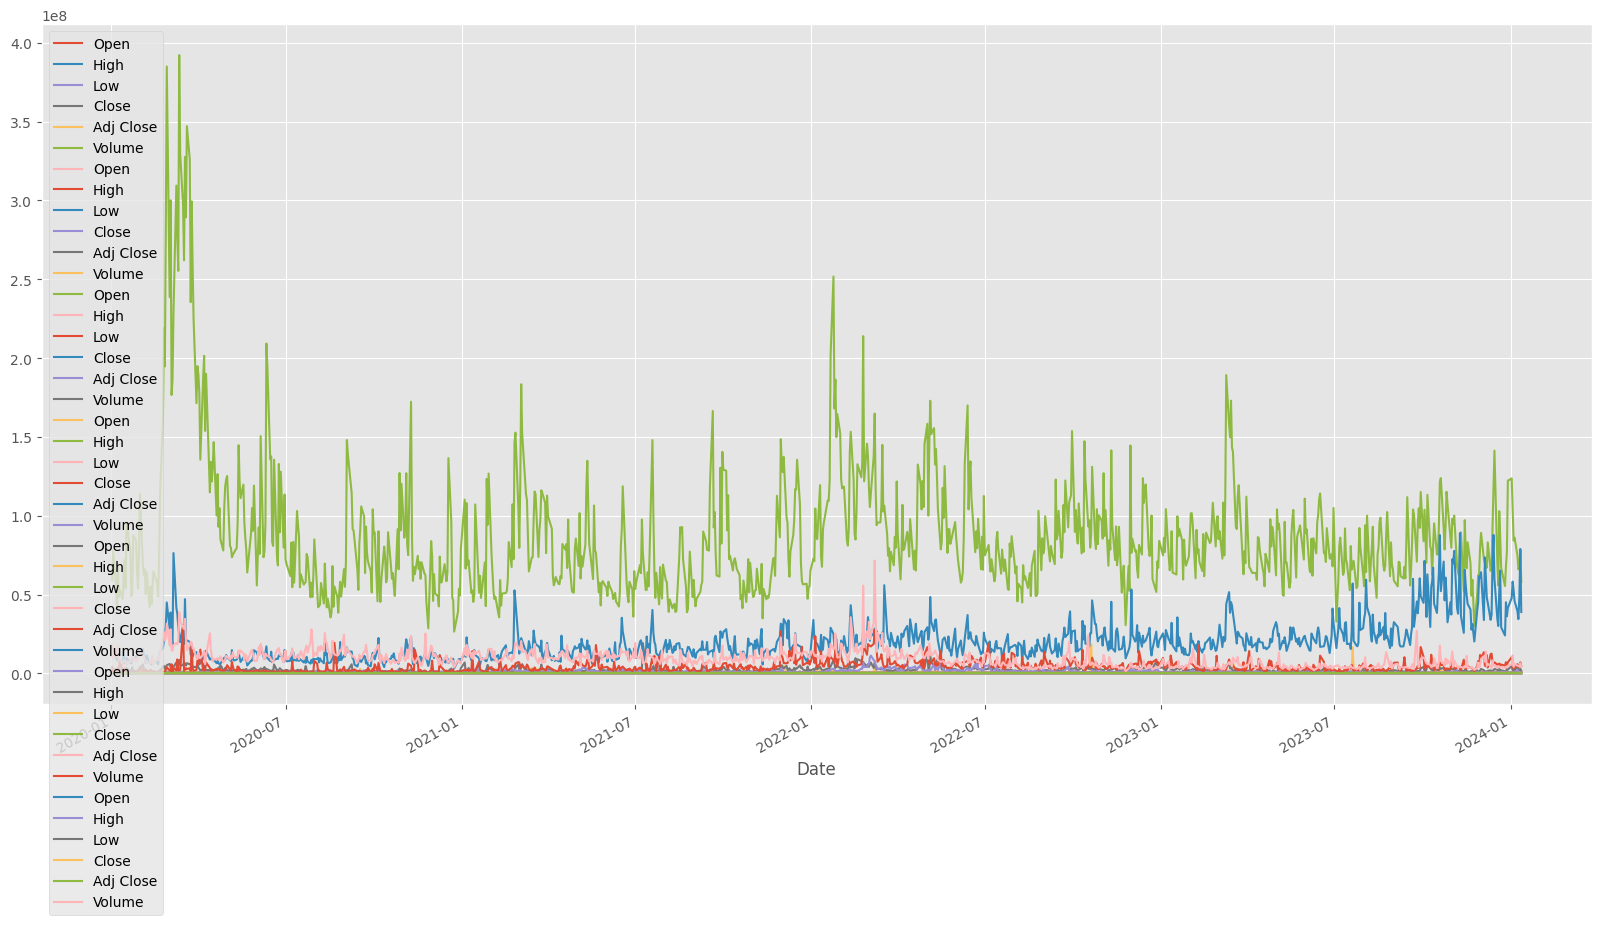

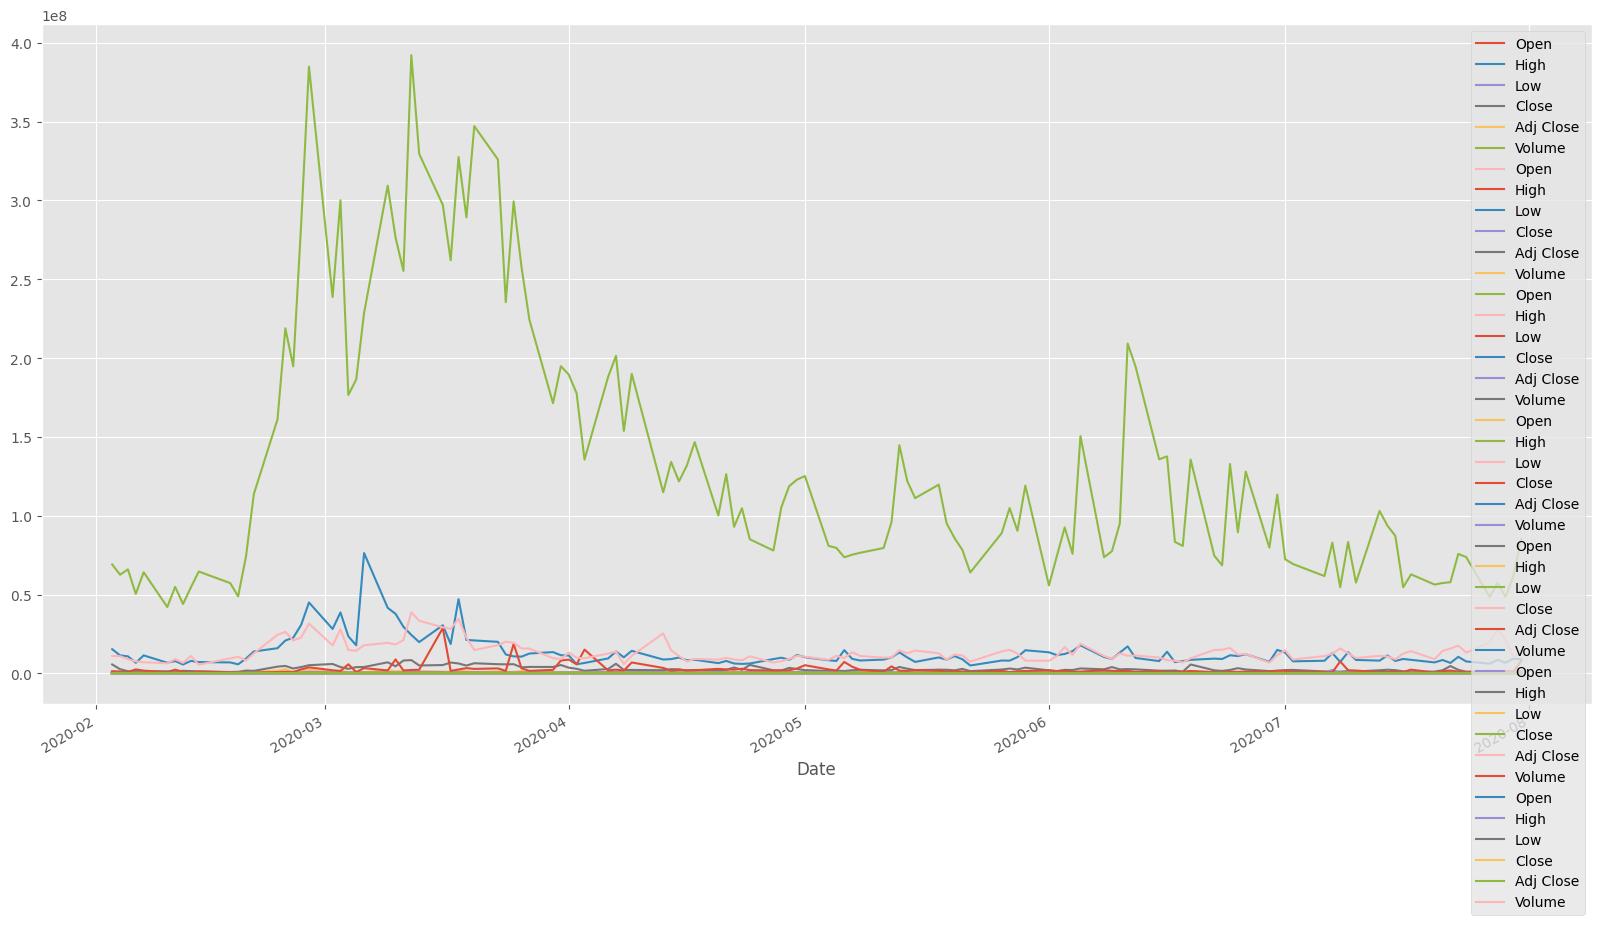

In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, datetime, time, timezone
# step 1

def get_stock_data(ticker, start, end):
    data = yf.download(ticker, start, end)
    data.insert(0, 'Ticker', ticker)
    return data

ticker = 'DIS'
start = datetime(2020,1,1)
end = datetime.today()
d = get_stock_data(ticker, start, end)
d.head()

# step 2

SPY = get_stock_data('SPY', start, end)
SPY_reset = SPY.reset_index()
SPY_pivot = SPY_reset.pivot(index='Date', columns='Ticker', values='Close')

IYW = get_stock_data("IYW", start, end)
VT = get_stock_data("VT", start, end)
DBA = get_stock_data("DBA", start, end)
TLT = get_stock_data("TLT", start, end)
PDBC = get_stock_data("PDBC", start, end)
IAU = get_stock_data("IAU", start, end)
SPY.info()

# step 3

stock = pd.concat([SPY, IYW, VT, DBA, TLT, PDBC, IAU], axis=1, join='outer')
stock.head()

plt.style.use('ggplot')
stock.plot(figsize=(20,10))
plt.show()

covid = stock['2020-2-1':'2020-7-31']
plt.style.use('ggplot')
covid.plot(figsize=(20,10))
plt.show()

x = covid.index
s_y = covid[['SPY']]
i_y = covid[['IAU']]
d_y = covid[['DBA']]
t_y = covid[['TLT']]

fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].plot(x, s_y)
axs[1].plot(x, i_y)
axs[2].plot(x, t_y)
fig.suptitle('Covid 19')

# step 4
ticker = 'PDBC'
start = datetime(2020,1,1)
end = datetime.today()
df = get_stock_data(ticker, start, end)
df.head()
x = df.index
y = df['Volume']
plt.figure(figsize=(15,3))
plt.bar(x,y)
plt.show()

# step 5
fig = plt.figure(figsize=(12,8))
top_grid = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom_grid = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)

plt.tight_layout()
plt.legend()
plt.show()

# step 6
pd.Series.shift()
stock.head()
stock['SPY']
stock['SPY'].shift(1)

# step 7
stock_daily_pc = (stock-stock.shift(1) / stock.shift(1) * 100)
stock_daily_pc.head()
stock_d_cr = stock_daily_pc.cumsum()
stock_d_cr.plot(figsize=(20,10))

# step 8
df_corr = stock_daily_pc.corr()
df_corr

plt.imshow(df_corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns)
plt.yticks(range(len(df_corr)), df_corr.columns)

plt.gcf().set_size_inches(10,10)
plt.scatter(df_corr.SPY, df_corr.VT)
plt.show()

# step 9
periods = 75
vol = stock_daily_pc.rolling(window=periods).std()
vol
vol['SPY'].plot()
vol['TLT'].plot()
vol['DBA'].plot()
